In [7]:
from sklearn import linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
import pandas as pd
import scipy as scp
import numpy as np
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split  ### for train and test split package
from sklearn import metrics  ## For calculation of MSE & RMSE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
dataset = pd.read_csv("Chemical Composion of Ceramic.csv");
dataset

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
5,FLQ-6-b,Body,0.62,0.18,18.82,73.79,4.28,0.30,0.04,0.96,350,20,80,10,390,10,40,80,130
6,FLQ-7-b,Body,0.45,0.33,17.65,74.99,3.53,0.70,0.07,1.28,650,20,90,90,410,30,30,90,140
7,FLQ-8-b,Body,0.59,0.45,21.42,71.46,3.47,0.35,0.05,1.20,500,10,70,50,380,70,40,80,440
8,FLQ-9-b,Body,0.42,0.53,23.12,67.41,3.81,0.74,0.16,2.81,340,40,120,30,370,20,30,150,180
9,FLQ-10-b,Body,0.56,0.49,19.86,72.00,4.51,0.25,0.23,1.10,330,20,70,20,350,10,40,130,150


In [4]:
dataset.head()

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [5]:
dataset.shape

(88, 19)

In [6]:
dataset.describe()

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.471705,0.430114,17.460909,69.825114,4.978409,4.171818,0.10125,1.561591,818.750000,30.909091,95.340909,38.522727,310.454545,228.863636,42.954545,145.454545,440.909091
std,0.348779,0.215030,4.703422,2.754377,0.879467,4.305801,0.05343,0.604276,614.240607,19.096630,33.901441,26.589246,69.809414,256.216646,12.879556,60.074840,402.653944
min,0.030000,0.070000,11.300000,63.880000,2.730000,0.120000,0.04000,0.580000,180.000000,0.000000,20.000000,0.000000,180.000000,-10.000000,20.000000,50.000000,50.000000
25%,0.247500,0.270000,13.007500,67.737500,4.337500,0.180000,0.07000,1.097500,380.000000,20.000000,70.000000,20.000000,250.000000,10.000000,30.000000,100.000000,97.500000
50%,0.375000,0.405000,16.205000,69.990000,5.065000,2.690000,0.08000,1.510000,590.000000,30.000000,90.000000,30.000000,320.000000,75.000000,40.000000,140.000000,365.000000
75%,0.642500,0.530000,21.707500,71.840000,5.590000,7.912500,0.13000,1.925000,982.500000,40.000000,112.500000,60.000000,370.000000,482.500000,50.000000,170.000000,697.500000
max,1.880000,1.320000,26.480000,75.950000,6.740000,13.690000,0.29000,3.110000,2970.000000,80.000000,230.000000,100.000000,450.000000,780.000000,80.000000,390.000000,1610.000000


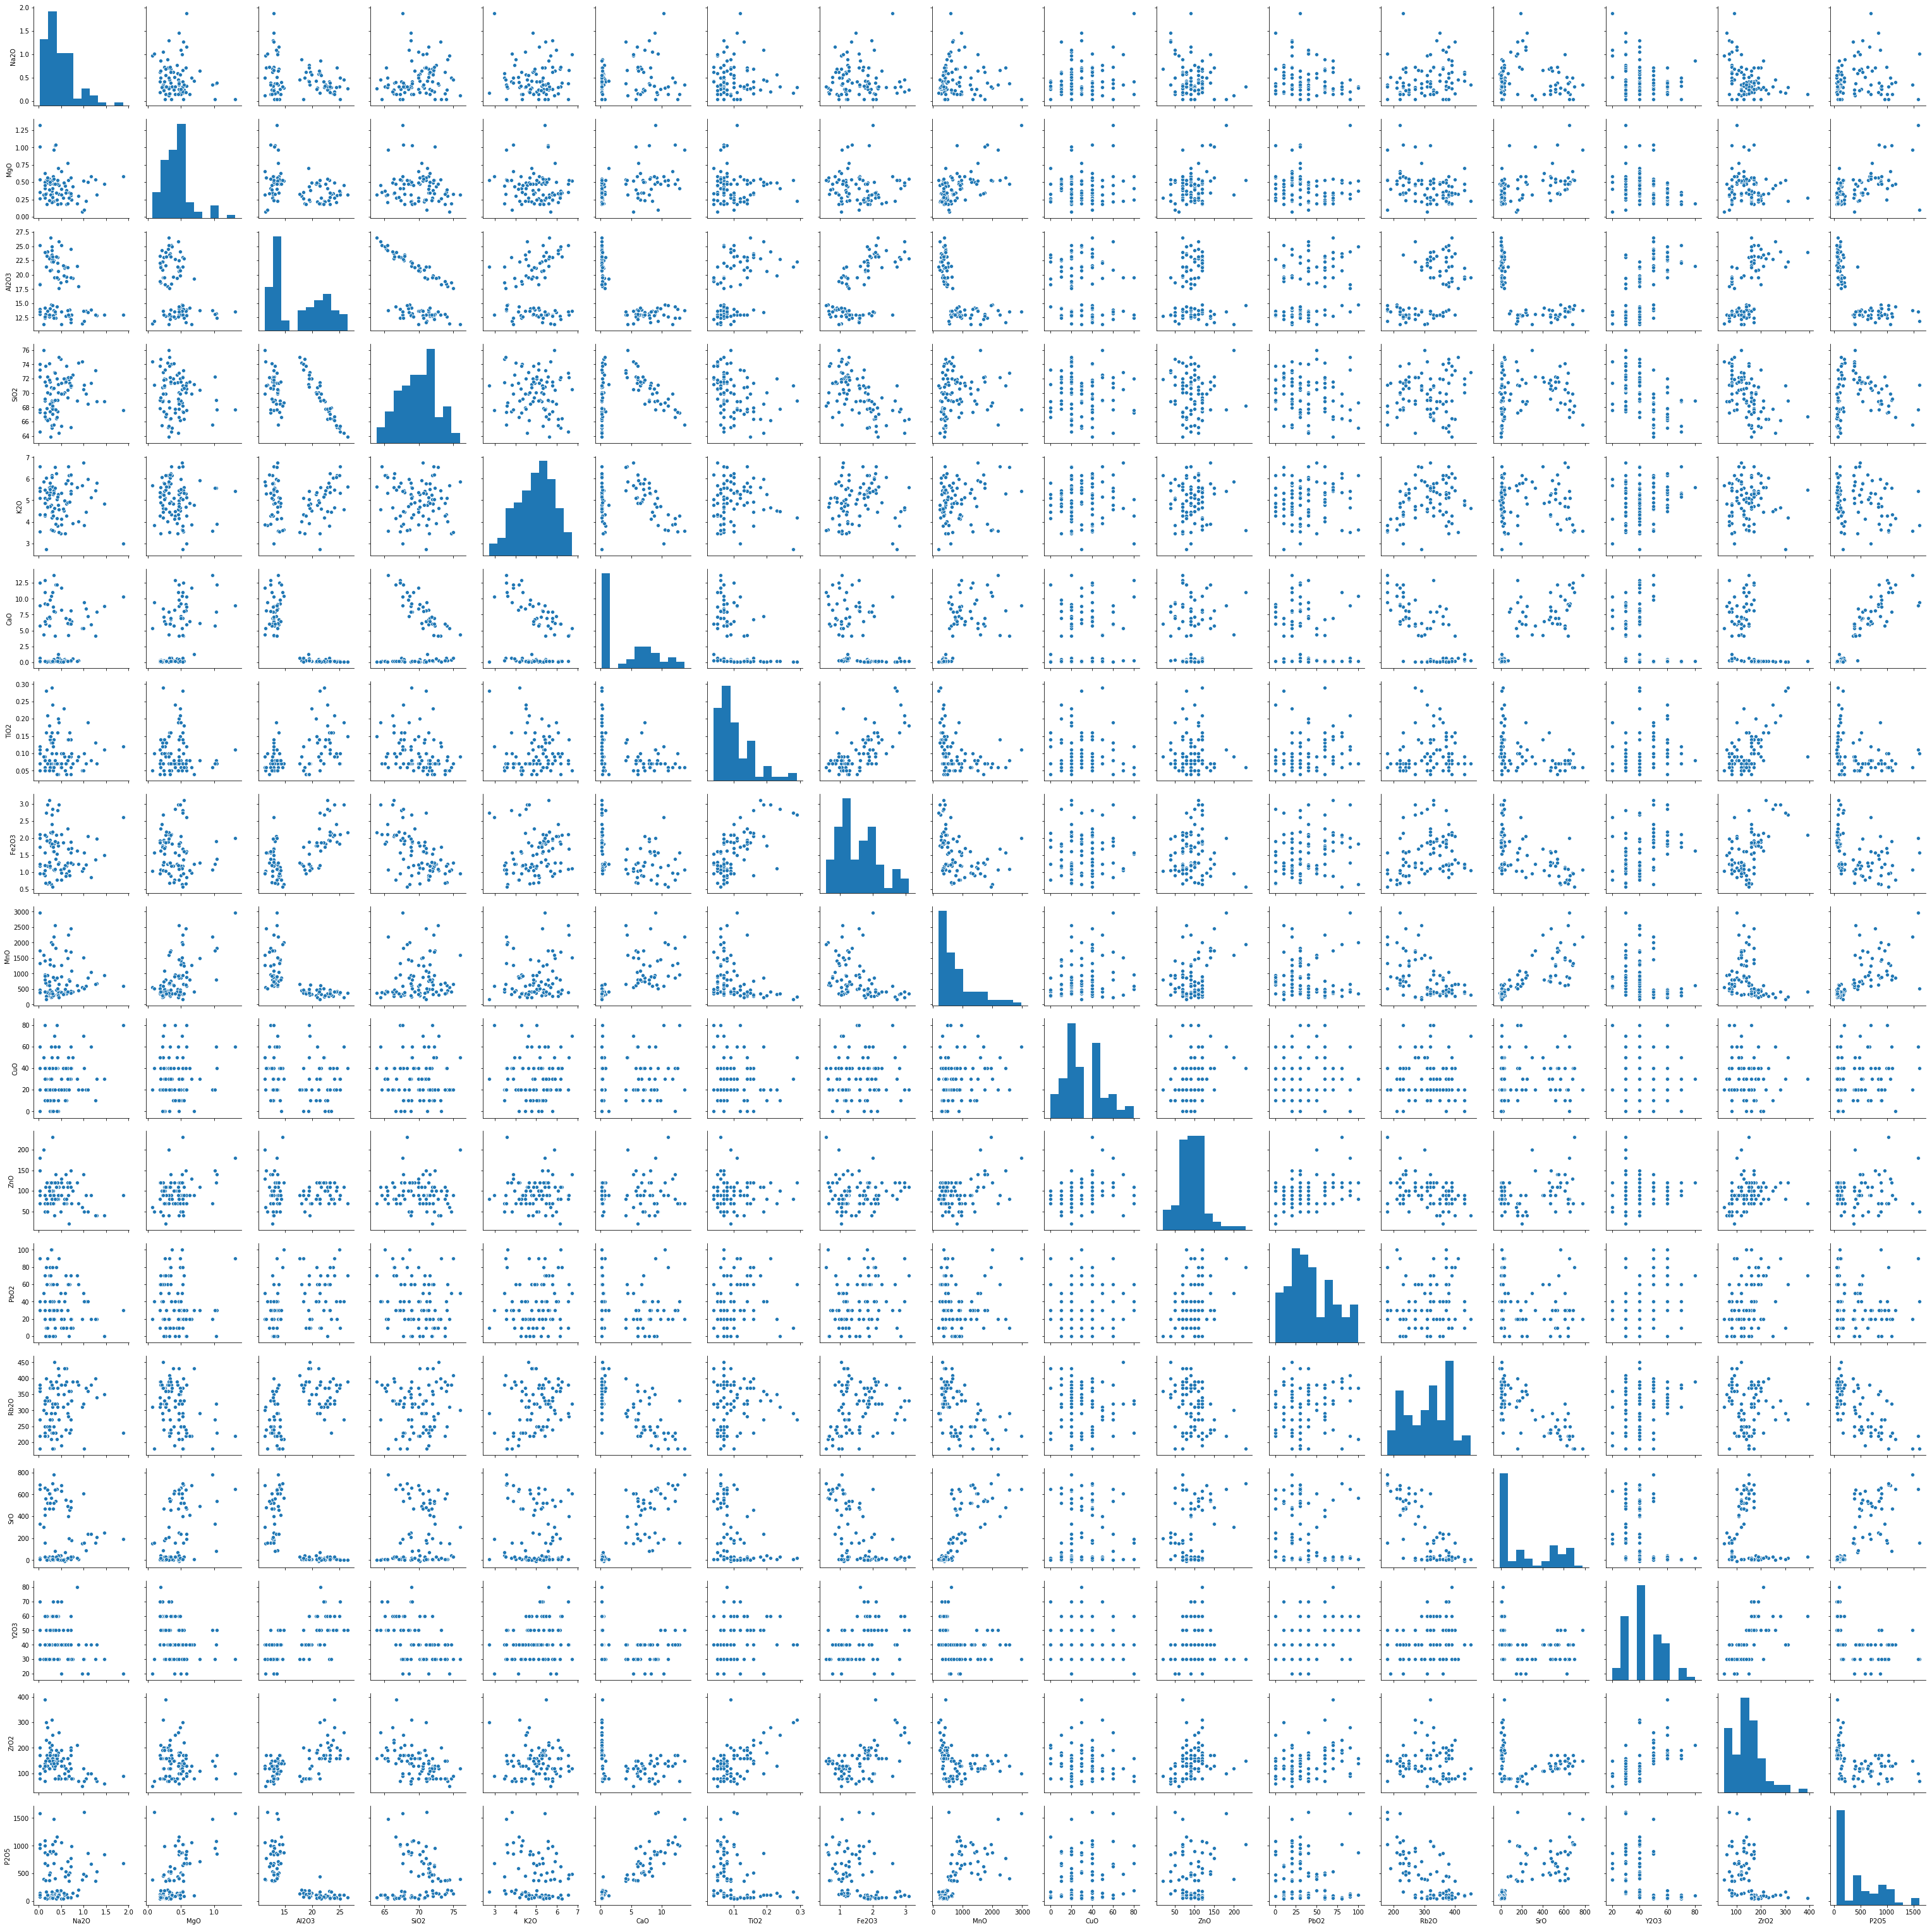

In [8]:
sns.pairplot(dataset)

In [21]:
xVal = dataset.drop(['Part'], axis=1)
xVal.head()

,Ceramic Name,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [22]:
yVal = dataset.Part.values.reshape(-1,1)

In [23]:
yVal.shape


(88, 1)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(xVal,yVal, test_size=0.2, random_state=42)

In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)

X_train shape: (70, 18)
X_test shape: (18, 18)
Y_train shape: (70, 1)
X_test shape: (18, 1)


# Applying Logistic Regression Model

In [26]:
### 1. Logistic Regression Model

lmod = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=0.0001,multi_class='ovr')

# Training the logistic model

In [ ]:
lrmod = lmod.fit(X_train,Y_train.ravel())
lrmod.intercept_  ### Intercapt (B0)
lrmod.coef_   ### Coefficients (B1, B2...)

# Predicting the test data

In [ ]:
predicted_data = lrmod.predict(X_test)  ### Predicting the  model for independent test data
predicted_data

# Confusion Matrix

In [ ]:
confusion_matrix(Y_test, predicted_data)
from sklearn import metrics as accuracyMatrics
accuracyMatrics.accuracy_score(Y_test, predicted_data)  ## Predicting accuracy score

In [ ]:
prec = accuracyMatrics.precision_score(Y_test, predicted_data)  ## Precision score
prec

In [ ]:
recall = accuracyMatrics.recall_score(Y_test, predicted_data)  ## Recall score
recall